In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [4]:
ANHA4_name=glob.glob('_data/NEMO/ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc')
ANH4_obj=nc.Dataset(ANHA4_name[0])
# Variables
nav_lon=ANH4_obj.variables['nav_lon'][:]
nav_lat=ANH4_obj.variables['nav_lat'][:]
runoff=ANH4_obj.variables['runoff'][:]*1e4

In [80]:
name = ['Pechora', 'Ob', 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', 'Sev. Dvina', 'Lena', 'khatanga', 'Taimyra', 'Pyasina']
lons = [52+3     , 66+4, 88-5     , 120     , 137   , 151.5      , 162     , -135       , 42-2        , 127   , 103+4     , 100      , 87     ]
lats = [67+1.5   , 66.5, 70+1     , 73      , 71.5  , 71.5       , 69.5    , 69         , 65          , 73.5  , 72+1.5    , 76       , 74     ]
name2 = ['Coppermine', 'Ellice', 'Back', 'Hayes', 'Kuujuua', 'Thomsen', 'Cunningham', 'Clyde']
lons2 = [-115        , -103.5 , -95.3, -92      , np.nan   , -120     , -94         , -68.5]
lats2 = [68          , 68     ,  67.2, 57       , np.nan   , 74       , 74          , 70.5]

In [81]:
#lons = [52, 66, 88, 123, 136, 148, 159, 135, 42, 127, 103, 100, 88]
#lats = [67, 67, 70, 72, 71, 70, 69, 68, 65, 73, 72, 76, 72]

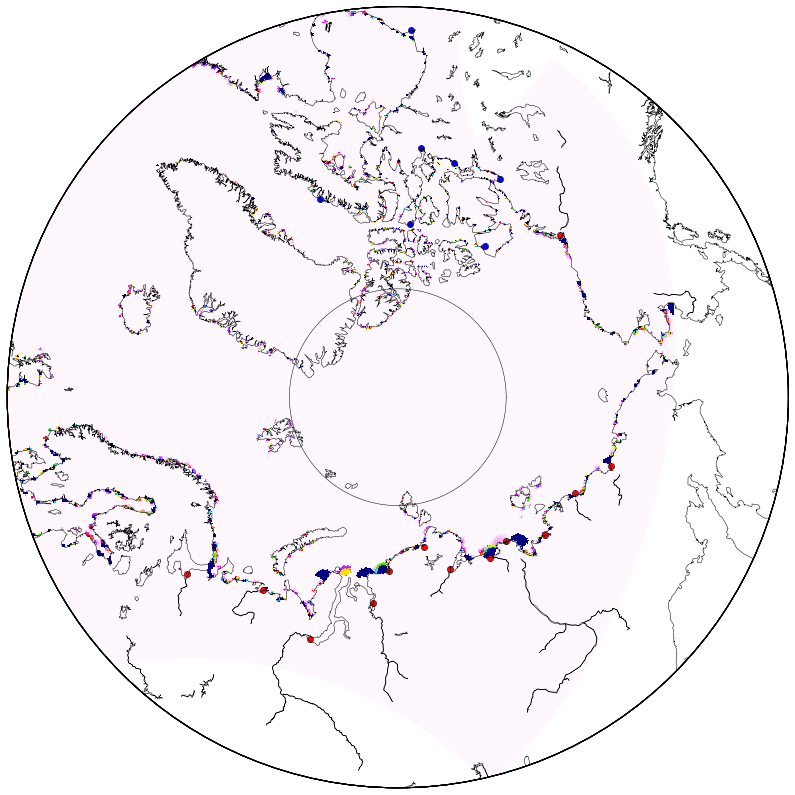

In [99]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawcoastlines(linewidth=0.5, linestyle='-', color='k', zorder=3)
x, y = proj(nav_lon, nav_lat)
xc, yc = proj(np.linspace(-180, 180, 180), np.ones([180])*80)
xs, ys = proj(lons, lats); xs2, ys2 = proj(lons2, lats2)
proj.plot(xc, yc, 'k-', linewidth=0.5, )
proj.plot(xs, ys, 'ro'); proj.plot(xs2, ys2, 'bo')
CS=proj.pcolor(x, y, np.nanmean(runoff, 0), vmin=0, vmax=1, cmap=plt.cm.gist_ncar_r)
plt.savefig('Arctic_river.png', dpi=400, facecolor='w', edgecolor='w',
            orientation='portrait', papertype='a4', format='png',
            transparent=True, bbox_inches='tight', pad_inches=0,
            frameon=None)